In [1]:
import sys
from pathlib import Path

project_root = Path.cwd().resolve().parent  # parent of notebooks/
sys.path.append(str(project_root))

from src.target_engineering import ProxyTargetGenerator
from src.utils.helpers import load_raw_data
from src.config.config import Config

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np



In [2]:
# Load the raw CSV file
data_path = Config.DATA_DIR / "raw"/ "data.csv"
df = load_raw_data(data_path)
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:
data_path = Config.DATA_DIR / "processed"/ "customer_features.csv"
df_with_features = load_raw_data(data_path)
df_with_features.head()

,Amount_sum,Amount_mean,Amount_count,Amount_std,transactionid_transactionid_76871_ratio,transactionid_transactionid_73770_ratio,transactionid_transactionid_26203_ratio,batchid_batchid_67019_ratio,batchid_batchid_51870_ratio,batchid_batchid_113893_ratio,...,productid_productid_6_ratio,productid_productid_3_ratio,productid_productid_10_ratio,productcategory_financial_services_ratio,productcategory_airtime_ratio,productcategory_utility_bill_ratio,channelid_channelid_3_ratio,channelid_channelid_2_ratio,channelid_channelid_5_ratio,CustomerId
0,-0.066891,-0.153364,-0.253459,-0.095504,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.0,CustomerId_1
1,-0.066891,-0.153364,-0.253459,-0.095504,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.0,CustomerId_10
2,-0.055849,-0.069870,-0.212186,-0.083421,0.0,0.0,0.0,0.0,0.0,0.0,...,0.400000,0.000000,0.400000,0.600000,0.400000,0.0,0.600000,0.400000,0.0,CustomerId_1001
3,-0.061655,-0.091435,-0.150278,-0.145414,0.0,0.0,0.0,0.0,0.0,0.0,...,0.545455,0.363636,0.000000,0.545455,0.454545,0.0,0.454545,0.545455,0.0,CustomerId_1002
4,-0.055849,-0.073846,-0.201868,-0.088882,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.166667,0.333333,0.500000,0.500000,0.0,0.666667,0.333333,0.0,CustomerId_1003


In [4]:
snapshot_date = pd.to_datetime(df['TransactionStartTime'].max()) + pd.Timedelta(days=1)
print("Snapshot date:", snapshot_date)


Snapshot date: 2019-02-14 10:01:28+00:00


In [5]:
proxy_gen = ProxyTargetGenerator(snapshot_date=snapshot_date)


2025-12-15 18:09:58,462 - INFO - ProxyTargetGenerator initialized.


In [6]:
rfm_df = proxy_gen.calculate_rfm(df)
rfm_df.head(10)


2025-12-15 18:09:58,479 - INFO - Calculating RFM metrics...
2025-12-15 18:09:58,806 - INFO - RFM metrics calculated.


,CustomerId,recency,frequency,monetary
0,CustomerId_1,84,1,10000
1,CustomerId_10,84,1,10000
2,CustomerId_1001,90,5,30400
3,CustomerId_1002,26,11,4775
4,CustomerId_1003,12,6,32000
5,CustomerId_1004,53,1,2000
6,CustomerId_1005,47,9,61200
7,CustomerId_1006,65,1,1000
8,CustomerId_1007,82,1,28000
9,CustomerId_1008,66,2,20000


In [7]:
rfm_df.sort_values('recency', ascending=False).head()



,CustomerId,recency,frequency,monetary
3670,CustomerId_899,91,1,10000
2664,CustomerId_450,91,3,2550
1145,CustomerId_2626,91,1,2000
791,CustomerId_2110,91,1,1000
3460,CustomerId_7324,91,2,19998


In [8]:
rfm_df.sort_values('frequency', ascending=False).head()


,CustomerId,recency,frequency,monetary
3478,CustomerId_7343,29,4091,104900000
1969,CustomerId_3634,34,2085,2726207
3390,CustomerId_647,1,1869,3905264
66,CustomerId_1096,7,784,2041334
2271,CustomerId_4033,12,778,1927834


In [9]:
rfm_df.sort_values('monetary', ascending=False).head()


,CustomerId,recency,frequency,monetary
3478,CustomerId_7343,29,4091,104900000
3678,CustomerId_909,12,115,83480760
400,CustomerId_1535,3,7,60212748
2952,CustomerId_4878,49,205,50912840
3180,CustomerId_5155,1,121,29763180


In [10]:
rfm_df[["recency", "frequency", "monetary"]].describe()

,recency,frequency,monetary
count,3742.000000,3742.000000,3.742000e+03
mean,31.461251,25.564404,2.531025e+05
std,27.118932,96.929602,2.715877e+06
min,1.000000,1.000000,5.000000e+01
25%,6.000000,2.000000,6.500000e+03
50%,25.000000,7.000000,3.200000e+04
75%,54.000000,20.000000,1.020600e+05
max,91.000000,4091.000000,1.049000e+08


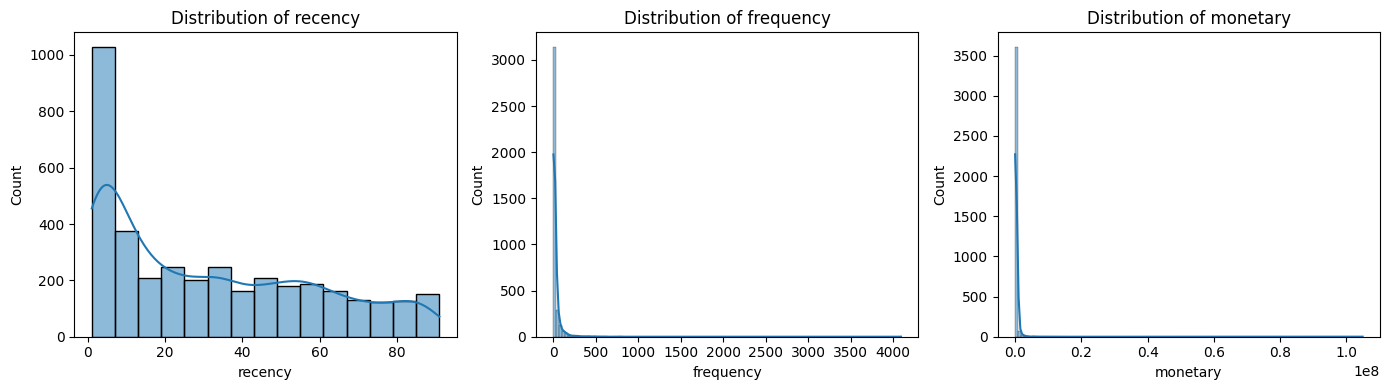

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for ax, col in zip(axes, ["recency", "frequency", "monetary"]):
    sns.histplot(rfm_df[col], ax=ax, kde=True)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

In [12]:
rfm_scaled = proxy_gen.scale_rfm(rfm_df)
rfm_scaled.head()


2025-12-15 18:09:59,319 - INFO - Scaling RFM features...
2025-12-15 18:09:59,324 - INFO - RFM features scaled.


,recency,frequency,monetary
0,1.937605,-0.253459,-0.089524
1,1.937605,-0.253459,-0.089524
2,2.158882,-0.212186,-0.082011
3,-0.201408,-0.150278,-0.091448
4,-0.717722,-0.201868,-0.081422


In [13]:
# 1️⃣ Cluster customers
clusters = proxy_gen.cluster_customers(rfm_scaled)

# 2️⃣ Inspect cluster centers
cluster_centers_scaled = pd.DataFrame(
    proxy_gen.kmeans.cluster_centers_,  # array from fitted KMeans
    columns=['recency', 'frequency', 'monetary']
)
cluster_centers_scaled.index.name = 'cluster'
cluster_centers_scaled


2025-12-15 18:09:59,339 - INFO - Clustering customers with KMeans...
2025-12-15 18:10:01,415 - INFO - Customers clustered into 3 clusters.


,recency,frequency,monetary
cluster,,,
0,1.121086,-0.184052,-0.060159
1,-0.691726,0.094380,-0.010418
2,-0.302827,11.132613,27.480428


In [14]:
rfm_df['cluster'] = clusters
print(rfm_df.groupby('cluster')[['recency','frequency','monetary']].mean())


           recency    frequency      monetary
cluster                                      
0        61.877279     7.720196  8.973793e+04
1        12.715398    34.703720  2.247565e+05
2        23.250000  1104.500000  7.487659e+07


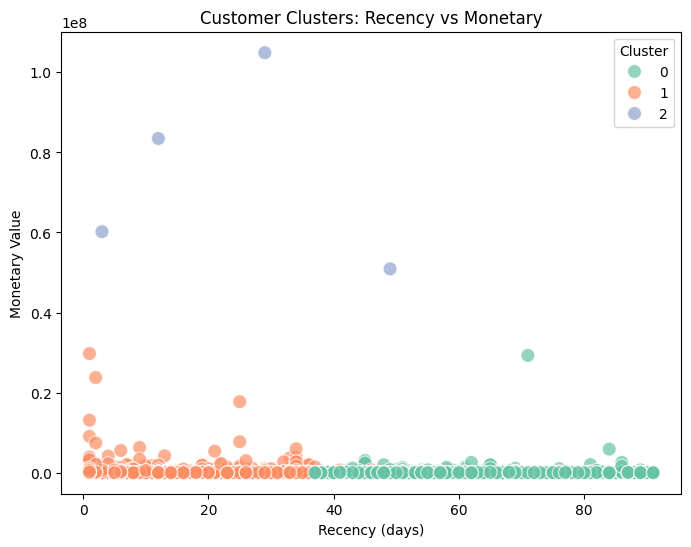

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=rfm_df,
    x='recency', 
    y='monetary', 
    hue='cluster', 
    palette='Set2', 
    s=100,
    alpha=0.7
)
plt.title("Customer Clusters: Recency vs Monetary")
plt.xlabel("Recency (days)")
plt.ylabel("Monetary Value")
plt.legend(title="Cluster")
plt.show()


2025-12-15 18:10:01,712 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\amare\AppData\Local\Temp\ipykernel_19036\2741095459.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rfm_cluster', y=col, data=cluster_summary, palette='viridis', ax=ax)
2025-12-15 18:10:01,718 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-15 18:10:01,745 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plott

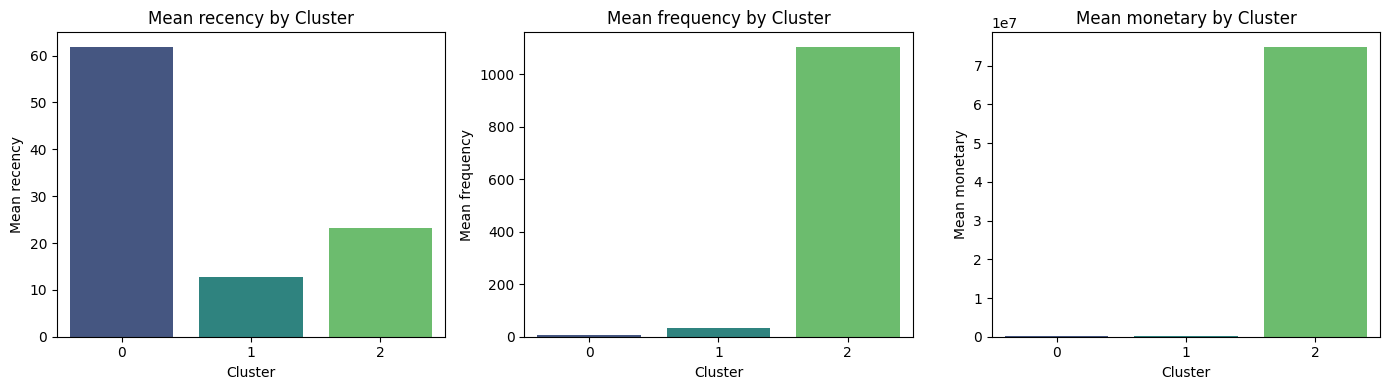

In [16]:
cluster_summary = rfm_df.groupby('cluster')[['recency', 'frequency', 'monetary']].mean().reset_index()
cluster_summary['rfm_cluster'] = cluster_summary['cluster'].astype(str)

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for ax, col in zip(axes, ['recency', 'frequency', 'monetary']):
    sns.barplot(x='rfm_cluster', y=col, data=cluster_summary, palette='viridis', ax=ax)
    ax.set_title(f'Mean {col} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(f'Mean {col}')

plt.tight_layout()
plt.show()


In [17]:
high_risk_df = proxy_gen.assign_high_risk(rfm_df, clusters)
high_risk_df.head()


2025-12-15 18:10:01,968 - INFO - Assigning high-risk labels...
2025-12-15 18:10:01,970 - INFO - High-risk labels assigned.


,CustomerId,is_high_risk
0,CustomerId_1,1
1,CustomerId_10,1
2,CustomerId_1001,1
3,CustomerId_1002,0
4,CustomerId_1003,0


In [18]:
# Merge clusters and RFM metrics with high-risk label
rfm_with_clusters = rfm_df.copy()
rfm_with_clusters['cluster'] = clusters
rfm_with_clusters = rfm_with_clusters.merge(
    high_risk_df,
    on='CustomerId',
    how='left'
)

# Inspect
rfm_with_clusters.head()


,CustomerId,recency,frequency,monetary,cluster,is_high_risk
0,CustomerId_1,84,1,10000,0,1
1,CustomerId_10,84,1,10000,0,1
2,CustomerId_1001,90,5,30400,0,1
3,CustomerId_1002,26,11,4775,1,0
4,CustomerId_1003,12,6,32000,1,0


In [19]:
high_risk_df['is_high_risk'].value_counts()


is_high_risk
0    2316
1    1426
Name: count, dtype: int64

2025-12-15 18:10:02,033 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\amare\AppData\Local\Temp\ipykernel_19036\2588473401.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
2025-12-15 18:10:02,038 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-15 18:10:02,068 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\amare\AppData\Local\Temp\ipykernel_19036\2588473401.py:1

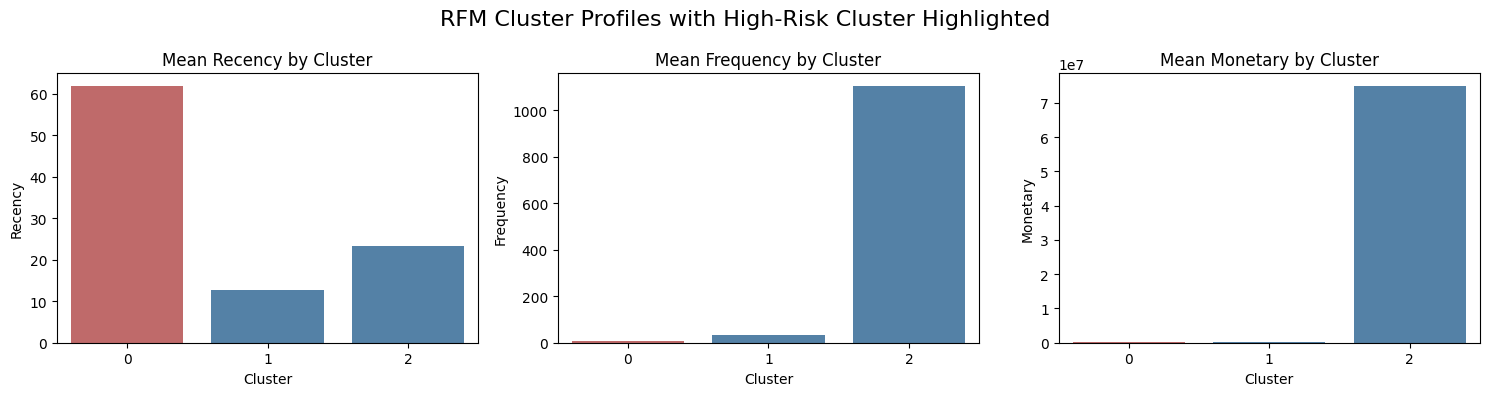

In [20]:


# Summarize clusters
cluster_summary = rfm_with_clusters.groupby('cluster')[['recency', 'frequency', 'monetary']].mean().reset_index()
cluster_summary['high_risk'] = cluster_summary['cluster'].isin(
    rfm_with_clusters.loc[rfm_with_clusters['is_high_risk'] == 1, 'cluster']
).astype(int)

# Color palette: high-risk = red, others = blue
palette = {0: 'steelblue', 1: 'indianred'}

# Create 3-panel barplot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
metrics = ['recency', 'frequency', 'monetary']

for ax, metric in zip(axes, metrics):
    sns.barplot(
        x='cluster',
        y=metric,
        data=cluster_summary,
        palette=[palette[h] for h in cluster_summary['high_risk']],
        ax=ax
    )
    ax.set_title(f'Mean {metric.capitalize()} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(metric.capitalize())

plt.suptitle('RFM Cluster Profiles with High-Risk Cluster Highlighted', fontsize=16)
plt.tight_layout()
plt.show()


2025-12-15 18:10:02,318 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\amare\AppData\Local\Temp\ipykernel_19036\3443051927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
2025-12-15 18:10:02,326 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


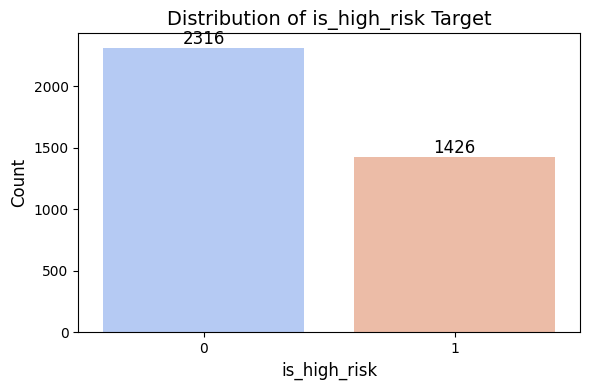

In [21]:


# Visualize high-risk vs low-risk distribution
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(
    x="is_high_risk", 
    data=rfm_with_clusters, 
    palette="coolwarm", 
    ax=ax
)

# Titles and labels
ax.set_title("Distribution of is_high_risk Target", fontsize=14)
ax.set_xlabel("is_high_risk", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Annotate counts on top of bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}", 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", 
        va="bottom", 
        fontsize=12
    )

plt.tight_layout()
plt.show()


In [22]:
# Columns to merge from RFM
rfm_cols = ['CustomerId', 'recency', 'frequency', 'monetary', 'is_high_risk']


# Merge RFM metrics and high-risk target into customer features
df_modeling = df_with_features.merge(
    rfm_with_clusters[rfm_cols],
    on='CustomerId',
    how='inner'  # use 'left' if you want to keep all rows in df_features
)

# Inspect
df_modeling.shape


(3742, 37)

In [23]:
df_modeling.head()

,Amount_sum,Amount_mean,Amount_count,Amount_std,transactionid_transactionid_76871_ratio,transactionid_transactionid_73770_ratio,transactionid_transactionid_26203_ratio,batchid_batchid_67019_ratio,batchid_batchid_51870_ratio,batchid_batchid_113893_ratio,...,productcategory_airtime_ratio,productcategory_utility_bill_ratio,channelid_channelid_3_ratio,channelid_channelid_2_ratio,channelid_channelid_5_ratio,CustomerId,recency,frequency,monetary,is_high_risk
0,-0.066891,-0.153364,-0.253459,-0.095504,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.000000,1.000000,0.0,CustomerId_1,84,1,10000,1
1,-0.066891,-0.153364,-0.253459,-0.095504,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.000000,1.000000,0.0,CustomerId_10,84,1,10000,1
2,-0.055849,-0.069870,-0.212186,-0.083421,0.0,0.0,0.0,0.0,0.0,0.0,...,0.400000,0.0,0.600000,0.400000,0.0,CustomerId_1001,90,5,30400,1
3,-0.061655,-0.091435,-0.150278,-0.145414,0.0,0.0,0.0,0.0,0.0,0.0,...,0.454545,0.0,0.454545,0.545455,0.0,CustomerId_1002,26,11,4775,0
4,-0.055849,-0.073846,-0.201868,-0.088882,0.0,0.0,0.0,0.0,0.0,0.0,...,0.500000,0.0,0.666667,0.333333,0.0,CustomerId_1003,12,6,32000,0


In [24]:

output_path = Config.DATA_DIR / "processed" / "customer_features__with_target.csv"


# Save CSV
df_modeling.to_csv(output_path, index=False)
print(f"Saved customer features to: {output_path}")
print(f"Shape: {df_modeling.shape}")


Saved customer features to: C:\Users\amare\Documents\KAIM\week-4\credit-risk-model\data\processed\customer_features__with_target.csv
Shape: (3742, 37)
